In [1]:
# Import required libraries
import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt
import numpy as np
import dataframe_image as dfi
import pingouin as pg # cronbach alpha test

In [2]:
df = pd.read_csv(r"C:\Users\kenny\OneDrive - purdue.edu\Documents\Kenny's File\Transportation Literature\Fall 2023\SPR 4706 - EV Public Perception Expectation and WTP\SPR 4706\res_dyneventh_apollo.csv")
# df = pd.read_csv(r"C:\Users\wijayak\OneDrive - purdue.edu\Documents\Kenny's File\Transportation Literature\Fall 2023\SPR 4706 - EV Public Perception Expectation and WTP\SPR 4706\res_dyneventh_apollo.csv")

save_path = "C:\\Users\\kenny\\OneDrive - purdue.edu\\Documents\\Kenny's File\\Transportation Literature\\Fall 2023\\SPR 4706 - EV Public Perception Expectation and WTP\\SPR 4706\\Exploratory Factor Analysis"


In [3]:
df.head()

,ResponseId,Age,EVExp,EVBrand,ChargeTimePref,Gender,Ethnic,Education,Occupation,Income,...,Restroom_DCFC,Restroom_DWPT,RRS_Level2,RRS_DCFC,RRS_DWPT,Age_Encode,Income_Encode,Education_Encode,Decision_Encode,task
0,R_01W8QXVzrPEiUIF,35-44,No EV Experience,NaN,NaN,Female,Non-hispanic,College graduate,Employed full-time,"$100,000 - $149,999",...,1,0,0,1,0,4,5,6,2,1
1,R_01W8QXVzrPEiUIF,35-44,No EV Experience,NaN,NaN,Female,Non-hispanic,College graduate,Employed full-time,"$100,000 - $149,999",...,0,0,0,0,0,4,5,6,1,2
2,R_01W8QXVzrPEiUIF,35-44,No EV Experience,NaN,NaN,Female,Non-hispanic,College graduate,Employed full-time,"$100,000 - $149,999",...,1,0,0,1,0,4,5,6,1,3
3,R_01W8QXVzrPEiUIF,35-44,No EV Experience,NaN,NaN,Female,Non-hispanic,College graduate,Employed full-time,"$100,000 - $149,999",...,0,0,1,0,0,4,5,6,1,4
4,R_01W8QXVzrPEiUIF,35-44,No EV Experience,NaN,NaN,Female,Non-hispanic,College graduate,Employed full-time,"$100,000 - $149,999",...,1,0,0,0,0,4,5,6,1,5


In [4]:
df_att = df.iloc[:, np.concatenate(([0], [2], np.arange(10,46)))]
df_att = df_att.drop_duplicates(subset='ResponseId')
df_att.head()

,ResponseId,EVExp,EV01,EV02,EV03,EV04,EV05,EV06,EV07,EV08,...,EvReli03,EvReli04,PubReli01,PubReli02,Pub01,Pub02,Pub03,Pub04,Pub05,Pub06
0,R_01W8QXVzrPEiUIF,No EV Experience,-1,-1,5,-1,-1,3,5,2,...,4.0,5.0,NaN,2.0,3,3.0,1.0,4.0,5.0,3.0
6,R_01zt65rXvSoryQV,No EV Experience,2,4,4,2,4,-1,3,4,...,2.0,2.0,NaN,4.0,3,4.0,4.0,3.0,5.0,1.0
12,R_06OkcJYEnQXcsz7,No EV Experience,3,4,5,4,3,3,5,4,...,5.0,3.0,NaN,4.0,1,1.0,4.0,2.0,5.0,2.0
18,R_07BvHRpnf5ZDS1P,No EV Experience,1,1,4,-1,1,1,1,1,...,1.0,1.0,NaN,1.0,5,5.0,5.0,5.0,1.0,5.0
24,R_07bKePCB0vNxazT,Have EV Experience,3,4,1,3,5,2,5,4,...,NaN,NaN,2.0,NaN,2,2.0,1.0,4.0,3.0,2.0


## Experienced

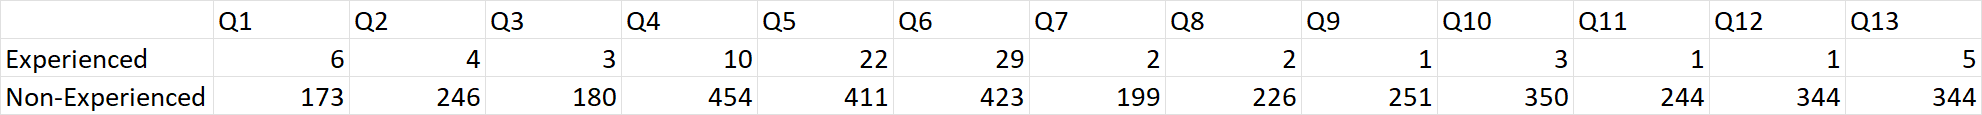

In [5]:
df_att_exp = df_att[df_att['EVExp'] == 'Have EV Experience']

In [6]:
df_att_exp = df_att_exp.drop(['ResponseId', 'EVExp', 
                              'EV04', 'EV05', 'EV06',
                              'EvReli01', 'EvReli02','EvReli03', 'EvReli04', 
                              'EvWill01', 'EvWill02', 'EvWill03', 'EvWill04', 'EvWill05', 'EvWill06',
                              'PubReli01', 'PubReli02'], 
                               axis=1)

In [7]:
df_att_exp = df_att_exp[df_att_exp != -1].dropna() # drop 11 people = 66 observations

In [8]:
df_att_exp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 24 to 7254
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EV01    186 non-null    float64
 1   EV02    186 non-null    float64
 2   EV03    186 non-null    float64
 3   EV07    186 non-null    float64
 4   EV08    186 non-null    float64
 5   EV09    186 non-null    float64
 6   EV010   186 non-null    float64
 7   EV011   186 non-null    float64
 8   EV012   186 non-null    float64
 9   EV013   186 non-null    float64
 10  Env01   186 non-null    float64
 11  Env02   186 non-null    float64
 12  Env03   186 non-null    float64
 13  Env04   186 non-null    float64
 14  INCTV   186 non-null    int64  
 15  Pub01   186 non-null    int64  
 16  Pub02   186 non-null    float64
 17  Pub03   186 non-null    float64
 18  Pub04   186 non-null    float64
 19  Pub05   186 non-null    float64
 20  Pub06   186 non-null    float64
dtypes: float64(19), int64(2)
memory usage

C:\Users\kenny\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [9]:
# Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix.
# to make sure they are uncorrelated. since 1 in identitiy matrix equal to fully correlated
chi_square_value,p_value=calculate_bartlett_sphericity(df_att_exp)
chi_square_value, p_value

(1401.2207898556842, 5.190379439700424e-175)

In [10]:
# Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis.
# KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. 
# KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.
kmo_all,kmo_model=calculate_kmo(df_att_exp)
kmo_model

0.7581278236648051

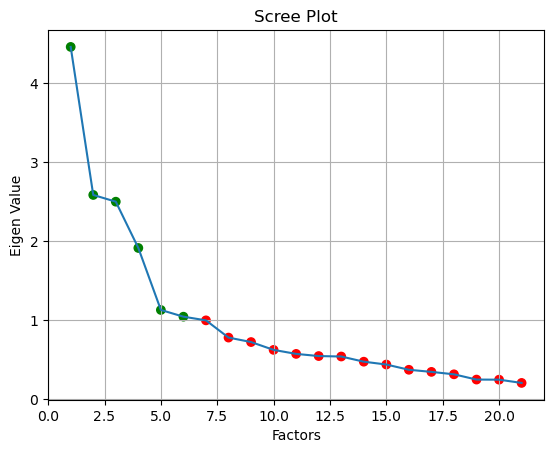

In [11]:
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=df_att_exp.shape[1])
fa.fit(df_att_exp)
ev,_ = fa.get_eigenvalues()
ev_color = np.where(ev > 1, 'green', 'red')
plt.scatter(range(1,df_att_exp.shape[1]+1),ev, color = ev_color)
plt.plot(range(1,df_att_exp.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()
plt.savefig(save_path + "\\EFA_Exp_EV.png")

In [12]:
rotations = ['varimax', 'oblimax', 'quartimax', 'equamax', 'promax', 'oblimin', 'quartimin']

for r in rotations:
    print('{} Rotation' .format(r))
    
    # Factor Loading
    fa = FactorAnalyzer(n_factors=(ev > 1).sum(),rotation = r)
    fa.fit(df_att_exp)
    fa_load = pd.DataFrame(fa.loadings_,index=df_att_exp.columns)
    fa_load = fa_load[fa_load >= 0.4]
    print(fa_load)
    dfi.export(fa_load, save_path + "\\EFA_Exp_FaLoad_{}.png" .format(r))
    
    fa_load = fa_load >= 0.4
    fa_load_dict = {col: fa_load.index[fa_load[col]].tolist() for col in fa_load.columns}
#     fa_load_dict
    
    # Cronbach Alpha Test
    try:
        for i in fa_load_dict.keys():
            print("Factor {} Cronbach's Alpha: {:.3f}".format(i, pg.cronbach_alpha(data=df_att_exp.loc[:, fa_load_dict[i]], ci=.99)[0]))
    except:
        pass
    
    # Factor Variance
    fa_var = pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'])
    print(fa_var)
    dfi.export(fa_var, save_path + "\\EFA_Exp_FaVar_{}.png" .format(r))
    
    print('\n')

varimax Rotation
              0         1         2         3         4         5
EV01        NaN  0.581969       NaN       NaN       NaN       NaN
EV02        NaN       NaN       NaN       NaN       NaN  0.577082
EV03        NaN       NaN       NaN       NaN       NaN       NaN
EV07        NaN  0.542158       NaN       NaN       NaN       NaN
EV08        NaN  0.829037       NaN       NaN       NaN       NaN
EV09        NaN       NaN  0.723233       NaN       NaN       NaN
EV010       NaN       NaN  0.638127       NaN       NaN       NaN
EV011       NaN  0.728927       NaN       NaN       NaN       NaN
EV012       NaN       NaN  0.629222       NaN       NaN  0.406317
EV013       NaN  0.439281  0.470621       NaN       NaN       NaN
Env01  0.737453       NaN       NaN       NaN       NaN       NaN
Env02  0.790874       NaN       NaN       NaN       NaN       NaN
Env03  0.787761       NaN       NaN       NaN       NaN       NaN
Env04  0.846736       NaN       NaN       NaN       NaN    

Factor 0 Cronbach's Alpha: 0.873
Factor 1 Cronbach's Alpha: 0.763
Factor 2 Cronbach's Alpha: 0.743
Factor 3 Cronbach's Alpha: 0.718
                         0         1         2         3         4         5
Variance          2.820474  2.374103  2.195896  1.892439  1.513138  0.785313
Proportional Var  0.134308  0.113053  0.104566  0.090116  0.072054  0.037396
Cumulative Var    0.134308  0.247361  0.351927  0.442043  0.514098  0.551493


oblimin Rotation
              0         1         2         3         4         5
EV01        NaN  0.490469       NaN       NaN       NaN       NaN
EV02        NaN       NaN       NaN       NaN       NaN  0.603162
EV03        NaN       NaN       NaN       NaN       NaN       NaN
EV07        NaN  0.452978       NaN       NaN       NaN       NaN
EV08        NaN  0.862820       NaN       NaN       NaN       NaN
EV09        NaN       NaN       NaN  0.762714       NaN       NaN
EV010       NaN       NaN       NaN  0.563783       NaN       NaN
EV011       N

In [13]:
print(pd.DataFrame(fa.get_communalities(),index=df_att_exp.columns,columns=['Communalities']))

       Communalities
EV01        0.408499
EV02        0.386887
EV03        0.251453
EV07        0.324325
EV08        0.757372
EV09        0.594183
EV010       0.410513
EV011       0.616851
EV012       0.466581
EV013       0.352516
Env01       0.548969
Env02       0.652417
Env03       0.665853
Env04       0.768507
INCTV       0.086451
Pub01       0.455199
Pub02       0.433826
Pub03       0.325103
Pub04       0.537565
Pub05       0.900645
Pub06       0.381144


In [12]:
df_att_exp = df_att_exp.astype(int)

In [24]:
# Define the Likert scale range
likert_scale = range(1, 6)

# Initialize an empty DataFrame to store the percentage summary
percentage_summary = pd.DataFrame(index=likert_scale)

# Calculate the percentage of responses for each question
for column in df_att_exp.columns:
    value_counts = df_att_exp[column].value_counts().reindex(likert_scale, fill_value=0)
    percentages = (value_counts / df_att_exp.shape[0]) * 100
    percentage_summary[column] = percentages.round(1)

# Print the percentage summary
percentage_summary

# Save the percentage summary to an Excel file
percentage_summary.to_excel(save_path + '\\AV_stats_exp.xlsx', sheet_name='Summary')


## Non-Experienced

In [17]:
df_att_noexp = df_att[df_att['EVExp'] == 'No EV Experience']

In [18]:
df_att_noexp = df_att_noexp.drop(['ResponseId', 'EVExp', 
                                  'EV01', 'EV02','EV03','EV04','EV05','EV06','EV07',
                                  'EV08','EV09','EV010','EV011','EV012','EV013',
                                  'EvReli01', 'EvReli02','EvReli03', 'EvReli04', 
                                  'PubReli01', 'PubReli02'], 
                                   axis=1)

In [19]:
df_att_noexp = df_att_noexp[df_att_noexp != -1].dropna() # drop 36 people = 216 observations

In [20]:
df_att_noexp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970 entries, 0 to 7260
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Env01     970 non-null    float64
 1   Env02     970 non-null    float64
 2   Env03     970 non-null    float64
 3   Env04     970 non-null    float64
 4   INCTV     970 non-null    int64  
 5   EvWill01  970 non-null    float64
 6   EvWill02  970 non-null    float64
 7   EvWill03  970 non-null    float64
 8   EvWill04  970 non-null    float64
 9   EvWill05  970 non-null    float64
 10  EvWill06  970 non-null    float64
 11  Pub01     970 non-null    int64  
 12  Pub02     970 non-null    float64
 13  Pub03     970 non-null    float64
 14  Pub04     970 non-null    float64
 15  Pub05     970 non-null    float64
 16  Pub06     970 non-null    float64
dtypes: float64(15), int64(2)
memory usage: 136.4 KB


In [20]:
# Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix.
# to make sure they are uncorrelated. since 1 in identitiy matrix equal to fully correlated
chi_square_value,p_value=calculate_bartlett_sphericity(df_att_noexp)
chi_square_value, p_value

(8200.76072384856, 0.0)

In [21]:
# Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis.
# KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. 
# KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.
kmo_all,kmo_model=calculate_kmo(df_att_noexp)
kmo_model

0.8569900063455664

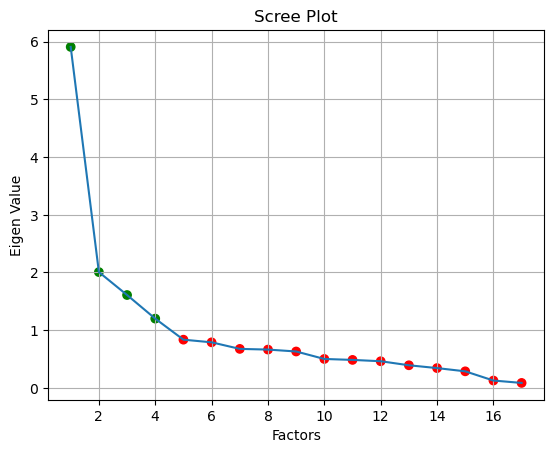

In [22]:
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=df_att_noexp.shape[1])
fa.fit(df_att_noexp)
ev,_ = fa.get_eigenvalues()
ev_color = np.where(ev > 1, 'green', 'red')
plt.scatter(range(1,df_att_noexp.shape[1]+1),ev, color = ev_color)
plt.plot(range(1,df_att_noexp.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()
plt.savefig(save_path + "\\EFA_NoExp_EV.png")

In [23]:
rotations = ['varimax', 'oblimax', 'quartimax', 'equamax', 'promax', 'oblimin', 'quartimin']

for r in rotations:
    print('{} Rotation' .format(r))
    
    # Factor Loading
    fa = FactorAnalyzer(n_factors=(ev > 1).sum(),rotation = r)
    fa.fit(df_att_noexp)
    fa_load = pd.DataFrame(fa.loadings_,index=df_att_noexp.columns)
    fa_load = fa_load[fa_load >= 0.4]
    print(fa_load)
    dfi.export(fa_load, save_path + "\\EFA_NoExp_FaLoad_{}.png" .format(r))
    
    fa_load = fa_load >= 0.4
    fa_load_dict = {col: fa_load.index[fa_load[col]].tolist() for col in fa_load.columns}
#     fa_load_dict
    
    # Cronbach Alpha Test
    try:
        for i in fa_load_dict.keys():
            print("Factor {} Cronbach's Alpha: {:.3f}".format(i, pg.cronbach_alpha(data=df_att_noexp.loc[:, fa_load_dict[i]], ci=.99)[0]))
    except:
        pass
    
    # Factor Variance
    fa_var = pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'])
    print(fa_var)
    dfi.export(fa_var, save_path + "\\EFA_Exp_FaVar_{}.png" .format(r))
    
    print('\n')

varimax Rotation
                 0         1         2         3
Env01     0.709081       NaN       NaN       NaN
Env02     0.750109       NaN       NaN       NaN
Env03     0.706573       NaN       NaN       NaN
Env04     0.777982       NaN       NaN       NaN
INCTV          NaN  0.548673       NaN       NaN
EvWill01       NaN  0.643342  0.464429       NaN
EvWill02       NaN       NaN  0.905001       NaN
EvWill03       NaN  0.713635  0.427435       NaN
EvWill04       NaN       NaN  0.860925       NaN
EvWill05       NaN  0.524018       NaN       NaN
EvWill06       NaN       NaN       NaN       NaN
Pub01          NaN       NaN       NaN  0.679344
Pub02          NaN       NaN       NaN  0.648706
Pub03          NaN       NaN       NaN       NaN
Pub04          NaN       NaN       NaN  0.585228
Pub05          NaN  0.457995       NaN       NaN
Pub06          NaN       NaN       NaN       NaN
Factor 0 Cronbach's Alpha: 0.859
Factor 1 Cronbach's Alpha: 0.822
Factor 2 Cronbach's Alpha: 0.902
Fa

Factor 0 Cronbach's Alpha: 0.859
Factor 1 Cronbach's Alpha: 0.822
Factor 2 Cronbach's Alpha: 0.943
Factor 3 Cronbach's Alpha: 0.671
                         0         1         2         3
Variance          2.435362  2.290723  1.846216  1.656924
Proportional Var  0.143257  0.134748  0.108601  0.097466
Cumulative Var    0.143257  0.278005  0.386606  0.484072




In [225]:
fa = FactorAnalyzer(n_factors= (ev > 1).sum(),rotation='varimax')
fa.fit(df_att_noexp)
fa_load = pd.DataFrame(fa.loadings_,index=df_att_noexp.columns)
fa_load = fa_load[fa_load >= 0.4]
print(fa_load)
dfi.export(fa_load, save_path + "\\EFA_NoExp_FaLoad_Varimax.png")

                 0         1         2         3
Env01     0.709081       NaN       NaN       NaN
Env02     0.750109       NaN       NaN       NaN
Env03     0.706573       NaN       NaN       NaN
Env04     0.777982       NaN       NaN       NaN
INCTV          NaN  0.548673       NaN       NaN
EvWill01       NaN  0.643342  0.464429       NaN
EvWill02       NaN       NaN  0.905001       NaN
EvWill03       NaN  0.713635  0.427435       NaN
EvWill04       NaN       NaN  0.860925       NaN
EvWill05       NaN  0.524018       NaN       NaN
EvWill06       NaN       NaN       NaN       NaN
Pub01          NaN       NaN       NaN  0.679344
Pub02          NaN       NaN       NaN  0.648706
Pub03          NaN       NaN       NaN       NaN
Pub04          NaN       NaN       NaN  0.585228
Pub05          NaN  0.457995       NaN       NaN
Pub06          NaN       NaN       NaN       NaN


In [226]:
fa_load = fa_load >= 0.4
fa_load_dict = {col: fa_load.index[fa_load[col]].tolist() for col in fa_load.columns}
fa_load_dict

try:
    for i in fa_load_dict.keys():
        print("Factor {} Cronbach's Alpha: {:.3f}".format(i, pg.cronbach_alpha(data=df_att_exp.loc[:, fa_load_dict[i]], ci=.99)[0]))
except:
    pass

Factor 0 Cronbach's Alpha: 0.865
Factor 1 Cronbach's Alpha: 0.435
Factor 2 Cronbach's Alpha: 0.634
Factor 3 Cronbach's Alpha: 0.693


In [227]:
fa = FactorAnalyzer(n_factors=(ev > 1).sum(),rotation='oblimin')
fa.fit(df_att_noexp)
fa_load = pd.DataFrame(fa.loadings_,index=df_att_noexp.columns)
fa_load = fa_load[fa_load >= 0.4]
print(fa_load)
dfi.export(fa_load, save_path + "\\EFA_NoExp_FaLoad_Oblimin.png")

                 0         1         2         3
Env01     0.763552       NaN       NaN       NaN
Env02     0.797768       NaN       NaN       NaN
Env03     0.697449       NaN       NaN       NaN
Env04     0.809971       NaN       NaN       NaN
INCTV          NaN  0.529659       NaN       NaN
EvWill01       NaN  0.641105       NaN       NaN
EvWill02       NaN       NaN  0.940829       NaN
EvWill03       NaN  0.729466       NaN       NaN
EvWill04       NaN       NaN  0.877316       NaN
EvWill05       NaN  0.578284       NaN       NaN
EvWill06       NaN       NaN       NaN       NaN
Pub01          NaN       NaN       NaN  0.688956
Pub02          NaN       NaN       NaN  0.623244
Pub03          NaN       NaN       NaN       NaN
Pub04          NaN       NaN       NaN  0.608860
Pub05          NaN  0.529019       NaN       NaN
Pub06          NaN       NaN       NaN       NaN


In [228]:
fa_load = fa_load >= 0.4
fa_load_dict = {col: fa_load.index[fa_load[col]].tolist() for col in fa_load.columns}
fa_load_dict

try:
    for i in fa_load_dict.keys():
        print("Factor {} Cronbach's Alpha: {:.3f}".format(i, pg.cronbach_alpha(data=df_att_exp.loc[:, fa_load_dict[i]], ci=.99)[0]))
except:
    pass

Factor 0 Cronbach's Alpha: 0.865
Factor 1 Cronbach's Alpha: 0.435
Factor 2 Cronbach's Alpha: 0.958
Factor 3 Cronbach's Alpha: 0.693


In [229]:
fa_var = pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'])
print(fa_var)
dfi.export(fa_var, save_path + "\\EFA_NoExp_FaVar.png")

                         0         1         2         3
Variance          2.435362  2.290723  1.846216  1.656924
Proportional Var  0.143257  0.134748  0.108601  0.097466
Cumulative Var    0.143257  0.278005  0.386606  0.484072


In [230]:
print(pd.DataFrame(fa.get_communalities(),index=df_att_noexp.columns,columns=['Communalities']))

          Communalities
Env01          0.590528
Env02          0.651558
Env03          0.544629
Env04          0.657276
INCTV          0.353679
EvWill01       0.495964
EvWill02       0.885881
EvWill03       0.581126
EvWill04       0.774978
EvWill05       0.348196
EvWill06       0.283686
Pub01          0.487489
Pub02          0.423124
Pub03          0.236369
Pub04          0.401861
Pub05          0.363999
Pub06          0.148882


In [22]:
df_att_noexp = df_att_noexp.astype(int)

In [25]:
# Define the Likert scale range
likert_scale = range(1, 6)

# Initialize an empty DataFrame to store the percentage summary
percentage_summary = pd.DataFrame(index=likert_scale)

# Calculate the percentage of responses for each question
for column in df_att_noexp.columns:
    value_counts = df_att_noexp[column].value_counts().reindex(likert_scale, fill_value=0)
    percentages = (value_counts / df_att_noexp.shape[0]) * 100
    percentage_summary[column] = percentages.round(1)

# Print the percentage summary
percentage_summary

# Save the percentage summary to an Excel file
percentage_summary.to_excel(save_path + '\\AV_stats_noexp.xlsx', sheet_name='Summary')
